Environment Setup: Before diving deep into the code let's setup our computer. To make setup installation easy i have make some script for easy installation. Script included: 1.Environment setup name(myenv) 2.CUDA 10.0 3.TensorFlow gpu 1.13.1 4.numpy 5.opencv

Download python script from my github link:

There were two script 1.easy_install_1.py 2.easy_install_2.py

first run easy_install_1.py and after reboot run easy_install_2.py

To install cudnn 7.3.1 Go to this link https://www.pytorials.com/how-to-install-tensorflow-gpu-with-cuda-10-0-for-python-on-ubuntu/2/ as this step require your authentication, it's recommended to install it manually.

Clone this darknet repo.

In [2]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
^C


Please follow this link for setup and installation of yolov2: https://timebutt.github.io/static/how-to-train-yolov2-to-detect-custom-objects/
He explaned in a great way.

Once you download and configure your yolo it's time to analyse the result.
In tutorial it was not given that how to analyse and evaluate result so i figured it out and here is the command just copy and paste in into you terminal with changes in your weights directory path.

In [ ]:
./darknet detector test cfg/obj.data cfg/yolo-obj.cfg backup/yolo-obj_2000.weights data/testimage.jp

I have trained this yolov2 model for upto 370 epochs on NVIDIA GeForce GTX 1050 and analyse the results.
In further steps i have plotted iteration vs loss curve, iteration vs iou curve and iteration vs mAP curve.
Also i have uploaded all the matrix.csv file.

Final prediction.

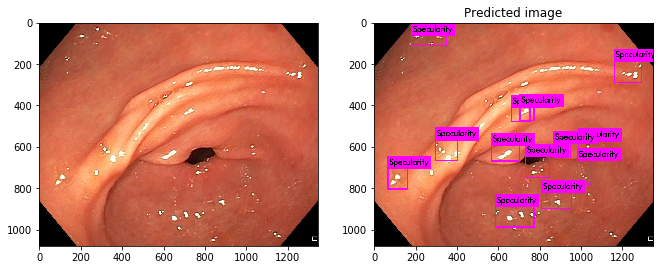

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 11 ,8

# read images
img_A = mpimg.imread('Final_prediction/testimage.jpg')
img_B = mpimg.imread('Final_prediction/predictions.jpg')

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A);
plt.title('Predicted image')
ax[1].imshow(img_B);

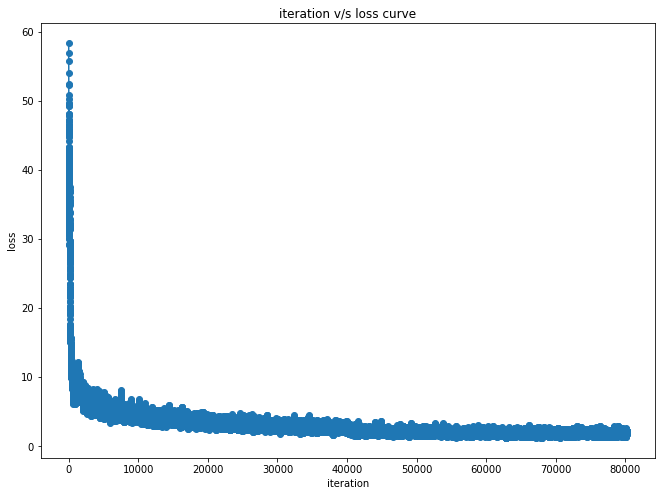

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x,y = np.loadtxt('results/iteration_loss.csv', unpack=True, delimiter=',')

plt.plot(x,y, marker='o')

plt.xlabel ('iteration')
plt.ylabel ('loss')
plt.title('iteration v/s loss curve')
#plt.savefig('epoch_loss_curve.png')
plt.show()

To draw matrix curve first i save all the epoch loss information into a log file and from that file i sliced my required information.

In [22]:
import re
import csv
line = []
list2 = []
with open('results/log.txt') as f:
    for i in f:
    	line.append(i)
    	outList = re.findall(r"[-+]?\d*\.\d+|\d+", line[0]) # extracting integers from string
    	list2.append(outList[0])
    	list2.append(outList[2])
	#writing into csv file 
    	with open('epoch_loss.csv', 'a') as csvFile:
    		writer = csv.writer(csvFile)
    		writer.writerow(list2)

    	line.clear()
    	list2.clear()

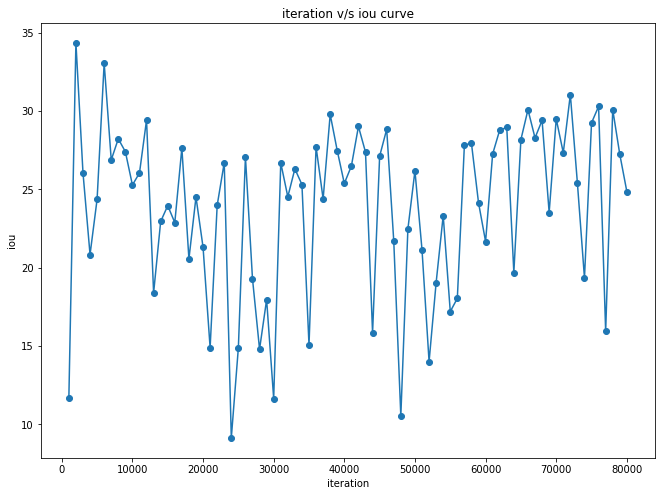

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x,y = np.loadtxt('results/iou.csv', unpack=True, delimiter=',')

plt.plot(x,y, marker='o')

plt.xlabel ('iteration')
plt.ylabel ('iou')
plt.title('iteration v/s iou curve')
#plt.savefig('epoch_loss_curve.png')
plt.show()

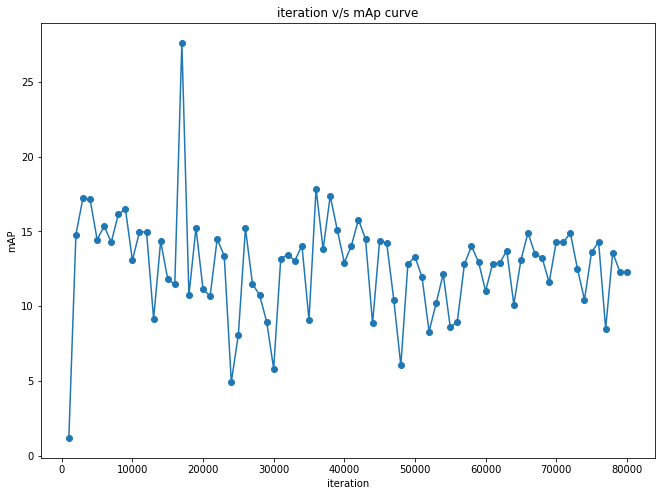

In [19]:
import matplotlib.pyplot as plt
import numpy as np

x,y = np.loadtxt('results/map.csv', unpack=True, delimiter=',')

plt.plot(x,y, marker='o')

plt.xlabel ('iteration')
plt.ylabel ('mAP')
plt.title('iteration v/s mAp curve')
#plt.savefig('epoch_loss_curve.png')
plt.show()

Here i have uploded my some weights on google drive to analyse result by youself.
link: https://drive.google.com/open?id=1_3iQdT055uAXxxpknGtV2wrdjTg0WJsX